# CS6364  Machine Learning Project


## Group 1
### Aseem Mishra
### Marttin Emmanuel
### Sagar Sheth

In [1]:
#pip install tensorflow

In [2]:
#pip install opencv-python

In [3]:
#pip install -U scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

### Reading Data Files

In [5]:
df1 = pd.read_csv('train_features.csv', encoding='utf-8')
df2=pd.read_csv('train_labels.csv', encoding='uatf-8')
df1.head()

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [6]:
df2.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16488 entries, 0 to 16487
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        16488 non-null  object
 1   filepath  16488 non-null  object
 2   site      16488 non-null  object
dtypes: object(3)
memory usage: 386.6+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16488 entries, 0 to 16487
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                16488 non-null  object 
 1   antelope_duiker   16488 non-null  float64
 2   bird              16488 non-null  float64
 3   blank             16488 non-null  float64
 4   civet_genet       16488 non-null  float64
 5   hog               16488 non-null  float64
 6   leopard           16488 non-null  float64
 7   monkey_prosimian  16488 non-null  float64
 8   rodent            16488 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


### Check for null values

In [9]:
df1.isna().sum()

id          0
filepath    0
site        0
dtype: int64

In [10]:
df2.isna().sum()

id                  0
antelope_duiker     0
bird                0
blank               0
civet_genet         0
hog                 0
leopard             0
monkey_prosimian    0
rodent              0
dtype: int64

In [11]:
df1.describe()

,id,filepath,site
count,16488,16488,16488
unique,16488,16488,148
top,ZJ000000,train_features/ZJ000000.jpg,S0060
freq,1,1,1132


### Adding .jpg extension

In [12]:
df2['id'] = df2['id'] + '.jpg'

In [15]:
df2

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16483,ZJ016483.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16484,ZJ016484.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16485,ZJ016485.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16486,ZJ016486.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import os


from pathlib import Path


from typing import Dict, List


from tqdm.auto import tqdm


import random


### Create a dataframe of 15000 images

In [20]:
df3=df2.sample(n= 15000,random_state=200)

# Preprocessing Images
### Read Images from dataframe and convert then into maxtrix using CV2 Library
### Resize them to 224x224 pixel in order to get uniformity and that it can be easily used in neural networks
### Normalize pixel value by dividing by 255
### Append Images and its label to  lists

In [21]:
image_dir = 'train_features/'
images = []
labels = []

for index, row in df3.iterrows():
    image_path = os.path.join(image_dir, row['id'])
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  
    image = image / 255.0 
    images.append(image)
    labels.append(row[1:])

### Creating X and Y by converting arrays into numpy arrays

In [178]:
X = np.array(images)
y = np.array(labels)
y.astype(np.float32)




array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [195]:
y_true_label = np.argmax(np.array(y), axis=1)

### Checking Spread of Output Variable

([<matplotlib.axis.XTick at 0x27911251550>,
 [Text(0, 0, 'antelope_duiker'),
  Text(1, 0, 'bird'),
  Text(2, 0, 'blank'),
  Text(3, 0, 'civet_genet'),
  Text(4, 0, 'hog'),
  Text(5, 0, 'leopard'),
  Text(6, 0, 'monkey_prosimian'),
  Text(7, 0, 'rodent')])

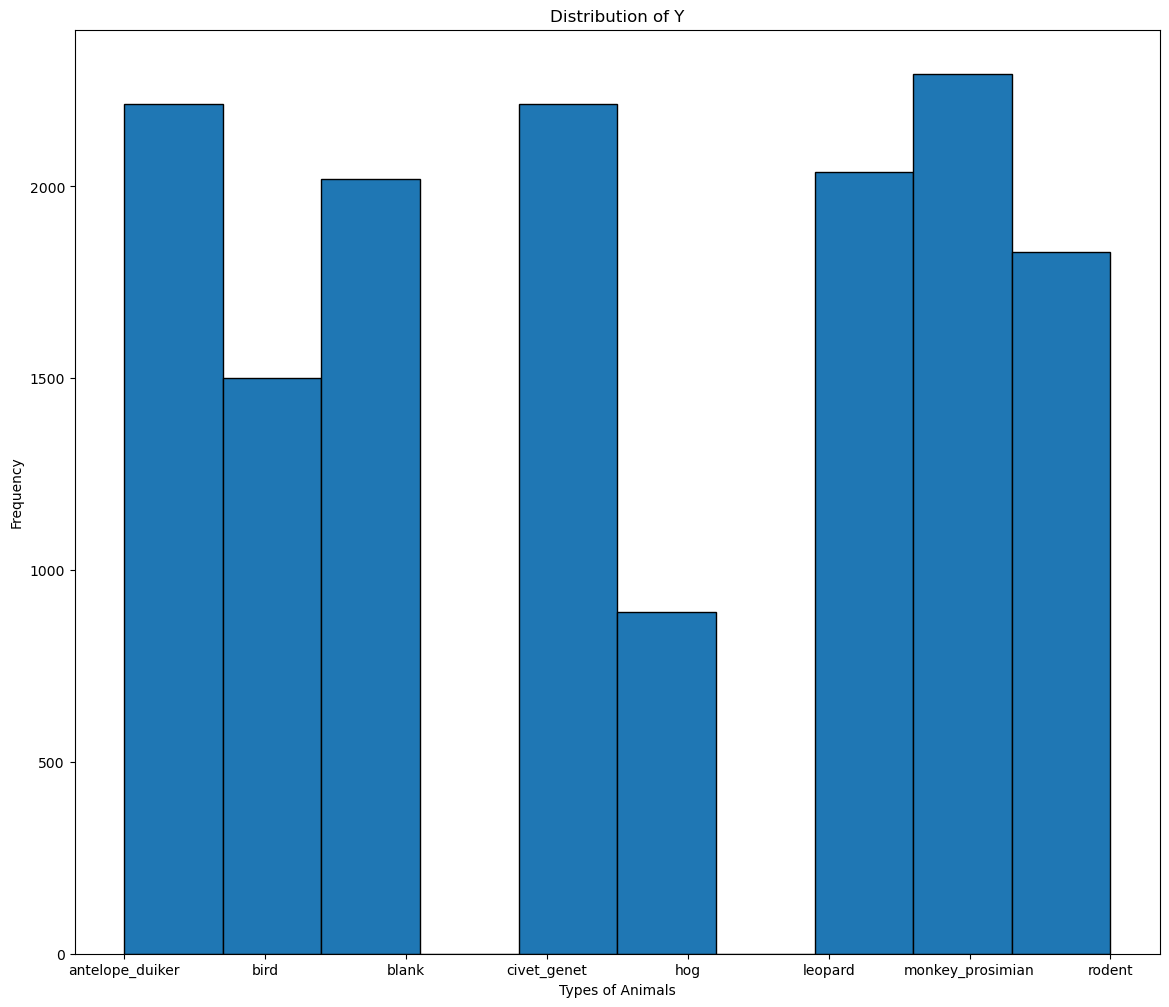

In [199]:
plt.figure(figsize=(14, 12))
plt.hist(y_true_label,edgecolor='black')
plt.title('Distribution of Y')
plt.xlabel('Types of Animals')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)

### Splitting Data into Train, Test and holdout with split of 70:20:10

In [23]:
X_train_temp, X_holdout, y_train_temp, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)



In [25]:
X_train.shape

(10800, 224, 224, 3)

In [26]:
X_test.shape

(2700, 224, 224, 3)

In [27]:
X_holdout.shape

(1500, 224, 224, 3)

### Converting to Tensflow Arrays

In [28]:
X_train= tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train, dtype=float, name='y')

X_test= tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test, dtype=float, name='y')

In [29]:
X_holdout= tf.convert_to_tensor(X_holdout)
y_holdout = tf.convert_to_tensor(y_holdout, dtype=float, name='y')

In [141]:
from sklearn.metrics import log_loss

In [37]:
from tensorflow.keras.models import Model


# Model 1
### 2 Convolutions layer with 3x3 filter and 2 Dense Layers

In [50]:
model3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 206s 605ms/step - loss: 1.4105 - accuracy: 0.4935 - val_loss: 0.9021 - val_accuracy: 0.6919
Epoch 2/10
338/338 [==============================] - 204s 604ms/step - loss: 0.7226 - accuracy: 0.7455 - val_loss: 0.7154 - val_accuracy: 0.7604
Epoch 3/10
338/338 [==============================] - 204s 603ms/step - loss: 0.4924 - accuracy: 0.8265 - val_loss: 0.5981 - val_accuracy: 0.8037
Epoch 4/10
338/338 [==============================] - 204s 603ms/step - loss: 0.3967 - accuracy: 0.8644 - val_loss: 0.6143 - val_accuracy: 0.8100
Epoch 5/10
338/338 [==============================] - 203s 601ms/step - loss: 0.3083 - accuracy: 0.8977 - val_loss: 0.5634 - val_accuracy: 0.8478
Epoch 6/10
338/338 [==============================] - 204s 604ms/step - loss: 0.2659 - accuracy: 0.9106 - val_loss: 0.5487 - val_accuracy: 0.8478
Epoch 7/10
338/338 [==============================] - 205s 607ms/step - loss: 0.2051 - accuracy: 0.9288 - val_loss: 0.5506 -

# Model 2
### 2 Convolutional layer with 4x4 Filter and 2 Dense Layer

In [58]:
model6 = keras.Sequential([
    layers.Conv2D(32, (4, 4), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model6.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model6.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 270s 795ms/step - loss: 1.4448 - accuracy: 0.4670 - val_loss: 1.0601 - val_accuracy: 0.6341
Epoch 2/10
338/338 [==============================] - 258s 763ms/step - loss: 0.8382 - accuracy: 0.7059 - val_loss: 0.7758 - val_accuracy: 0.7478
Epoch 3/10
338/338 [==============================] - 254s 753ms/step - loss: 0.5618 - accuracy: 0.8055 - val_loss: 0.6781 - val_accuracy: 0.7696
Epoch 4/10
338/338 [==============================] - 256s 757ms/step - loss: 0.4719 - accuracy: 0.8381 - val_loss: 0.6456 - val_accuracy: 0.7937
Epoch 5/10
338/338 [==============================] - 255s 754ms/step - loss: 0.3534 - accuracy: 0.8797 - val_loss: 0.6427 - val_accuracy: 0.8211
Epoch 6/10
338/338 [==============================] - 257s 760ms/step - loss: 0.2934 - accuracy: 0.8994 - val_loss: 0.6340 - val_accuracy: 0.8304
Epoch 7/10
338/338 [==============================] - 255s 754ms/step - loss: 0.2510 - accuracy: 0.9138 - val_loss: 0.6247 -

# Model 3
### 2 Convolutional Layer with 3x3 Filter and 1 Dense Layer

In [57]:
model7 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model7.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model7.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 246s 727ms/step - loss: 1.6485 - accuracy: 0.4776 - val_loss: 1.0136 - val_accuracy: 0.6533
Epoch 2/10
338/338 [==============================] - 247s 730ms/step - loss: 0.8253 - accuracy: 0.7172 - val_loss: 0.7521 - val_accuracy: 0.7533
Epoch 3/10
338/338 [==============================] - 243s 719ms/step - loss: 0.5804 - accuracy: 0.8067 - val_loss: 0.7077 - val_accuracy: 0.7659
Epoch 4/10
338/338 [==============================] - 242s 716ms/step - loss: 0.4464 - accuracy: 0.8516 - val_loss: 0.5932 - val_accuracy: 0.8148
Epoch 5/10
338/338 [==============================] - 243s 719ms/step - loss: 0.3589 - accuracy: 0.8790 - val_loss: 0.5986 - val_accuracy: 0.8278
Epoch 6/10
338/338 [==============================] - 232s 687ms/step - loss: 0.2985 - accuracy: 0.9022 - val_loss: 0.6700 - val_accuracy: 0.8226
Epoch 7/10
338/338 [==============================] - 232s 687ms/step - loss: 0.2571 - accuracy: 0.9136 - val_loss: 0.5778 -

# Model 4 - Transfer Learning

In [45]:
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable=False
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)

### Model Description

In [46]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

### Training the model with different epoch size

#### Epoc size=10

In [47]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
338/338 [==============================] - 1141s 3s/step - loss: 1.6472 - accuracy: 0.3641 - val_loss: 1.4509 - val_accuracy: 0.4152
Epoch 2/10
338/338 [==============================] - 1141s 3s/step - loss: 1.4119 - accuracy: 0.4600 - val_loss: 1.3818 - val_accuracy: 0.4459
Epoch 3/10
338/338 [==============================] - 1140s 3s/step - loss: 1.3226 - accuracy: 0.5023 - val_loss: 1.2691 - val_accuracy: 0.5181
Epoch 4/10
338/338 [==============================] - 1147s 3s/step - loss: 1.2508 - accuracy: 0.5340 - val_loss: 1.2025 - val_accuracy: 0.5507
Epoch 5/10
338/338 [==============================] - 1133s 3s/step - loss: 1.1869 - accuracy: 0.5602 - val_loss: 1.2292 - val_accuracy: 0.5448
Epoch 6/10
338/338 [==============================] - 1134s 3s/step - loss: 1.1419 - accuracy: 0.5745 - val_loss: 1.1317 - val_accuracy: 0.5737
Epoch 7/10
338/338 [==============================] - 1139s 3s/step - loss: 1.1112 - accuracy: 0.5864 - val_loss: 1.1034 - val_accuracy:

#### Epoc Size=20

In [48]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
338/338 [==============================] - 1135s 3s/step - loss: 0.9799 - accuracy: 0.6360 - val_loss: 1.0168 - val_accuracy: 0.6263
Epoch 2/20
338/338 [==============================] - 1134s 3s/step - loss: 0.9520 - accuracy: 0.6466 - val_loss: 0.9589 - val_accuracy: 0.6515
Epoch 3/20
338/338 [==============================] - 1155s 3s/step - loss: 0.9220 - accuracy: 0.6615 - val_loss: 1.0022 - val_accuracy: 0.6448
Epoch 4/20
338/338 [==============================] - 1140s 3s/step - loss: 0.8968 - accuracy: 0.6724 - val_loss: 0.9483 - val_accuracy: 0.6574
Epoch 5/20
338/338 [==============================] - 1133s 3s/step - loss: 0.8803 - accuracy: 0.6806 - val_loss: 0.9231 - val_accuracy: 0.6696
Epoch 6/20
338/338 [==============================] - 1135s 3s/step - loss: 0.8553 - accuracy: 0.6868 - val_loss: 0.9054 - val_accuracy: 0.6793
Epoch 7/20
338/338 [==============================] - 1137s 3s/step - loss: 0.8372 - accuracy: 0.6917 - val_loss: 0.9324 - val_accuracy:

### Saving Models

In [54]:
model2.save("TransferLearning")

INFO:tensorflow:Assets written to: TransferLearning\assets


INFO:tensorflow:Assets written to: TransferLearning\assets


In [55]:
model3.save("2conv2Dense")

INFO:tensorflow:Assets written to: 2conv2Dense\assets


INFO:tensorflow:Assets written to: 2conv2Dense\assets


In [61]:
model6.save("2conv2Dense")

INFO:tensorflow:Assets written to: 2conv2Dense\assets


INFO:tensorflow:Assets written to: 2conv2Dense\assets


In [62]:
model7.save("2conv1Dense")

INFO:tensorflow:Assets written to: 2conv1Dense\assets


INFO:tensorflow:Assets written to: 2conv1Dense\assets


# Performance Metrics - Validation Set

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, confusion_matrix,roc_curve, auc,multilabel_confusion_matrix

In [95]:
import seaborn as sns

In [89]:
ypred = np.argmax(ypred, axis=1)


In [90]:
y_true_labels = np.argmax(np.array(y_test), axis=1)

In [93]:
cm = confusion_matrix(y_true_labels, ypred)


In [103]:
classlabel=['antelope_duiker',
'bird',               
'blank',               
'civet_genet',       
'hog',                
'leopard',            
'monkey_prosimian',    
'rodent' ]             

In [79]:
y_true

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [102]:
labels[0]

antelope_duiker     0.0
bird                0.0
blank               0.0
civet_genet         0.0
hog                 0.0
leopard             0.0
monkey_prosimian    1.0
rodent              0.0
Name: 2688, dtype: object

### Predicting Value on Model 1

In [111]:
ypred3=model3.predict(X_test)

85/85 [==============================] - 10s 114ms/step


### Predicting Value on Model 2

In [109]:
ypred1=model6.predict(X_test)

85/85 [==============================] - 12s 134ms/step


### Predicting Value on Model 3

In [88]:
ypred=model7.predict(X_test)

85/85 [==============================] - 10s 112ms/step


### Predicting Values on Model 4

In [165]:
ypred4=model2.predict(X_test)
ypredholdout4=model2.predict(X_holdout)

47/47 [==============================] - 139s 3s/step


In [112]:
ypred1 = np.argmax(ypred1, axis=1)

ypred3 = np.argmax(ypred3, axis=1)

In [167]:
ypred4 = np.argmax(ypred4, axis=1)

### Log Losses on Validation set

In [180]:
loglossval = log_loss(ypred,y_test)
loglossval1 = log_loss(ypred1,y_test)
loglossval3 = log_loss(ypred3,y_test)
loglossval4 = log_loss(ypred4,y_test)
print(f"Log Loss  For  Model 1 on Validation set: {loglossval3}") 
print(f"Log Loss  For  Model 2 on Validation set: {loglossval1}") 
print(f"Log Loss  For  Model 3 on Validation set: {loglossval}") 
print(f"Log Loss  For  Model 4 on Validation set: {loglossval4}") 

Log Loss  For  Model 1 on Validation set: 5.580091524685546
Log Loss  For  Model 2 on Validation set: 5.54004302091986
Log Loss  For  Model 3 on Validation set: 5.219654990794375
Log Loss  For  Model 4 on Validation set: 14.217218836818438


In [113]:
cm1 = confusion_matrix(y_true_labels, ypred1)

cm3 = confusion_matrix(y_true_labels, ypred3)


In [168]:
cm4 = confusion_matrix(y_true_labels, ypred4)

### Classification Report for Model 1

In [119]:
print(classification_report(y_true_labels, ypred3,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.78      0.61      0.68       401
            bird       0.93      0.99      0.96       276
           blank       0.56      0.63      0.59       347
     civet_genet       0.92      0.97      0.94       397
             hog       0.96      0.93      0.95       150
         leopard       0.96      0.93      0.95       365
monkey_prosimian       0.89      0.91      0.90       463
          rodent       0.85      0.86      0.86       301

        accuracy                           0.85      2700
       macro avg       0.85      0.85      0.85      2700
    weighted avg       0.85      0.85      0.84      2700



### Classification Report for Model 2

In [114]:
print(classification_report(y_true_labels, ypred1,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.75      0.59      0.66       401
            bird       0.96      0.97      0.97       276
           blank       0.56      0.59      0.58       347
     civet_genet       0.93      0.97      0.95       397
             hog       0.92      0.95      0.93       150
         leopard       0.93      0.92      0.93       365
monkey_prosimian       0.88      0.92      0.90       463
          rodent       0.88      0.94      0.91       301

        accuracy                           0.85      2700
       macro avg       0.85      0.86      0.85      2700
    weighted avg       0.84      0.85      0.84      2700



### Classification Report for Model 3

In [108]:
print(classification_report(y_true_labels, ypred,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.72      0.70      0.71       401
            bird       0.96      0.98      0.97       276
           blank       0.62      0.56      0.59       347
     civet_genet       0.92      0.96      0.94       397
             hog       0.94      0.99      0.96       150
         leopard       0.94      0.95      0.94       365
monkey_prosimian       0.91      0.90      0.90       463
          rodent       0.87      0.91      0.89       301

        accuracy                           0.86      2700
       macro avg       0.86      0.87      0.86      2700
    weighted avg       0.85      0.86      0.85      2700



### Classification Report for Model 4

In [169]:
print(classification_report(y_true_labels, ypred4,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.40      0.41      0.40       401
            bird       0.81      0.31      0.45       276
           blank       0.51      0.33      0.40       347
     civet_genet       0.80      0.91      0.86       397
             hog       0.93      0.59      0.72       150
         leopard       0.70      0.93      0.80       365
monkey_prosimian       0.48      0.68      0.56       463
          rodent       0.64      0.55      0.59       301

        accuracy                           0.61      2700
       macro avg       0.66      0.59      0.60      2700
    weighted avg       0.62      0.61      0.59      2700



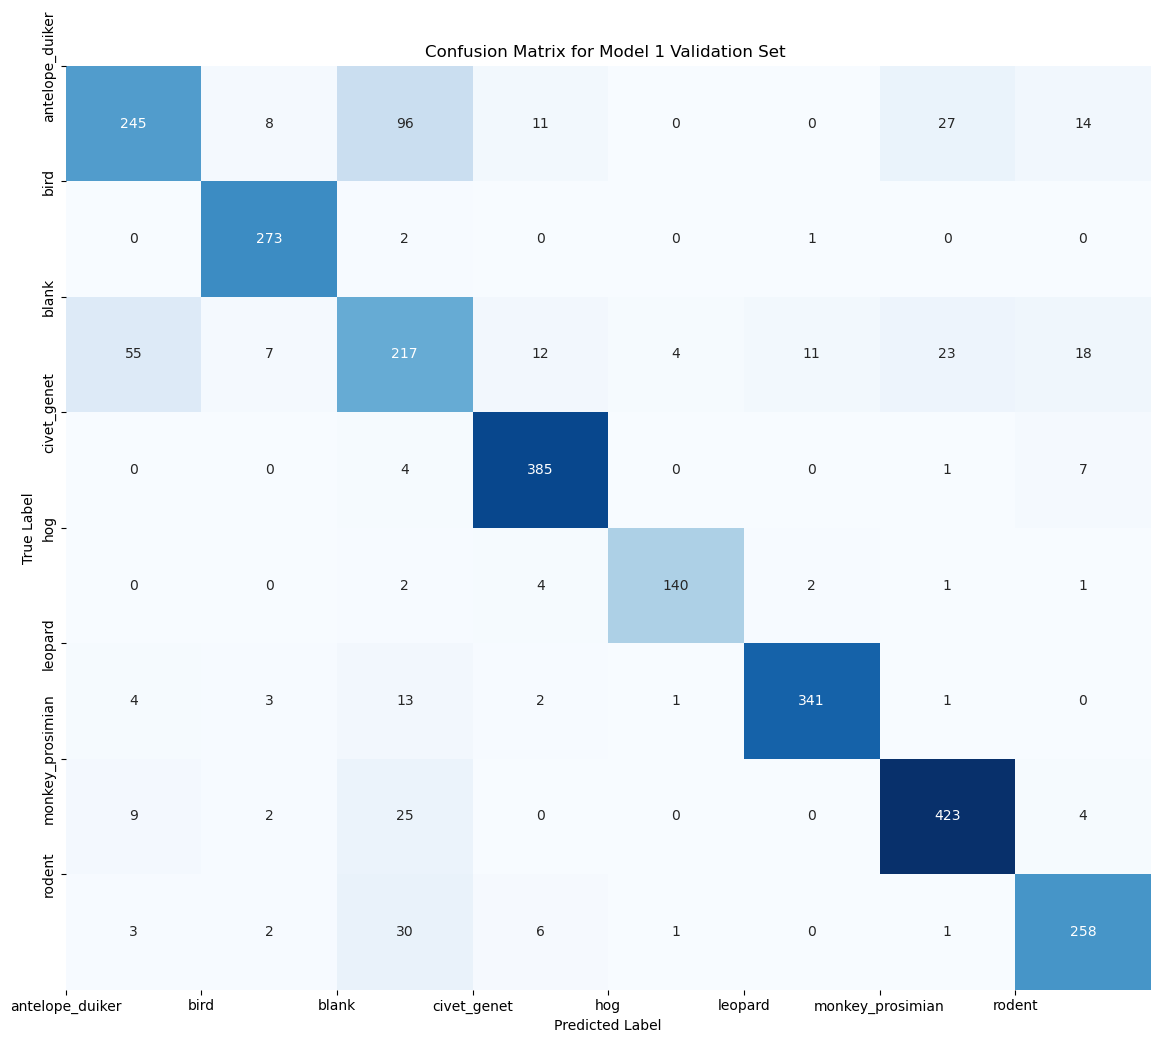

In [185]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 1 Validation Set ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()


## Creating Confusion Matrix

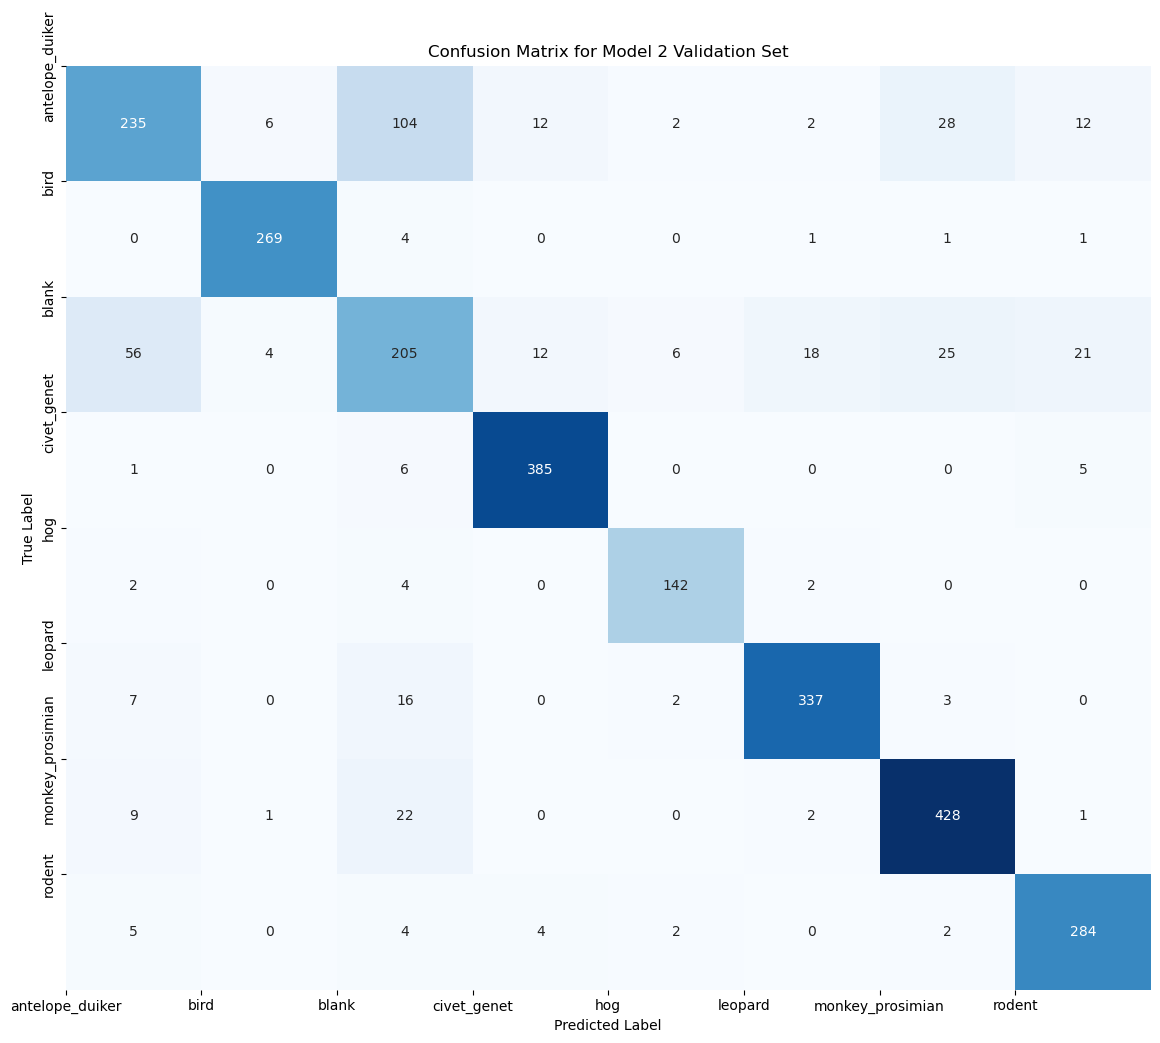

In [182]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 2 Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()


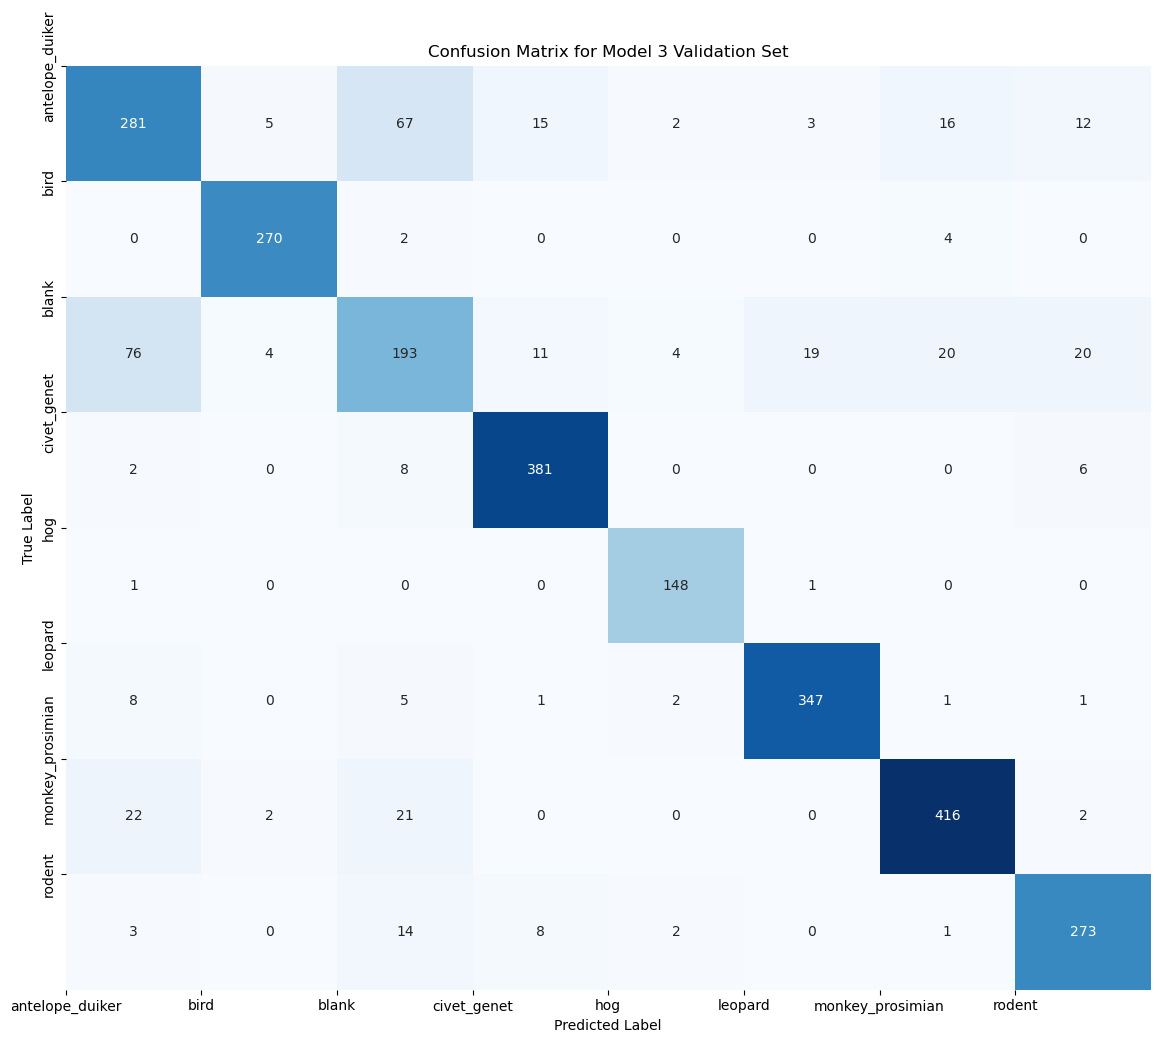

In [184]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 3 Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()


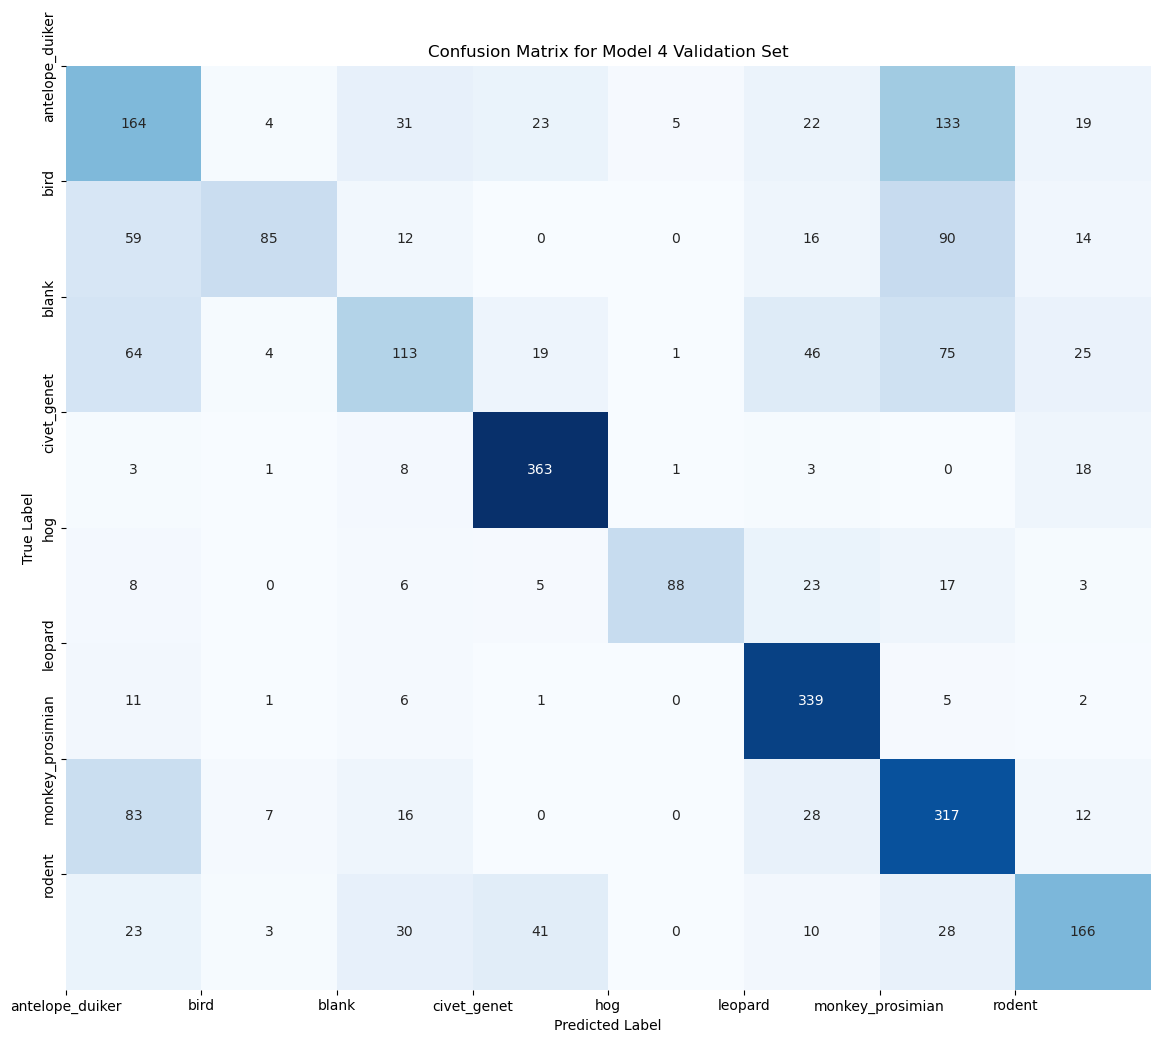

In [186]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 4 Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()

# Performance Metrics - Holdout Set

### Calculate Predictions for Model 1

In [125]:
ypredholdout3=model3.predict(X_holdout)

47/47 [==============================] - 6s 117ms/step


### Calculate Predictions for Model 2

In [124]:
ypredholdout1=model6.predict(X_holdout)

47/47 [==============================] - 7s 140ms/step


### Calculate Predictions for Model 3

In [123]:
ypredholdout=model7.predict(X_holdout)

47/47 [==============================] - 6s 112ms/step


In [129]:
y_true_labels_holdout = np.argmax(np.array(y_holdout), axis=1)

In [126]:
ypredholdout = np.argmax(ypredholdout, axis=1)


In [127]:
ypredholdout1 = np.argmax(ypredholdout1, axis=1)



In [128]:
ypredholdout3 = np.argmax(ypredholdout3, axis=1)

In [172]:
ypredholdout4 = np.argmax(ypredholdout4, axis=1)

In [155]:
ypredholdout

array([3, 0, 5, ..., 2, 1, 3], dtype=int64)

In [156]:
y_true_labels_holdout

array([3, 0, 5, ..., 2, 1, 3], dtype=int64)

### Log Losses for Models for Holdout Set

In [188]:
loglossholdout4 = log_loss(ypredholdout4,y_holdout,labels=np.arange(len(y_test[0])))

loglossholdout1 = log_loss(ypredholdout1,y_holdout,labels=np.arange(len(y_test[0])))
loglossholdout3 = log_loss(ypredholdout3,y_holdout,labels=np.arange(len(y_test[0])))
loglossholdout = log_loss(ypredholdout,y_holdout,labels=np.arange(len(y_test[0])))

print(f"Log Loss for Model 1: {loglossholdout3}")
print(f"Log Loss for Model 2: {loglossholdout1}")
print(f"Log Loss for Model 3: {loglossholdout}")
print(f"Log Loss for Model 4: {loglossholdout4}")


Log Loss for Model 1: 5.6708681332211
Log Loss for Model 2: 5.718926337739923
Log Loss for Model 3: 5.310431599329929
Log Loss for Model 4: 13.912850208199224


In [130]:
cm1holdout = confusion_matrix(y_true_labels_holdout, ypredholdout)



In [131]:
cm1holdout1 = confusion_matrix(y_true_labels_holdout, ypredholdout1)

In [132]:
cm1holdout3 = confusion_matrix(y_true_labels_holdout, ypredholdout3)

In [173]:
cm1holdout4 = confusion_matrix(y_true_labels_holdout, ypredholdout4)

### Classification Report for Model 1

In [136]:
print(classification_report(y_true_labels_holdout, ypredholdout3,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.79      0.62      0.69       241
            bird       0.94      0.98      0.96       150
           blank       0.48      0.58      0.53       168
     civet_genet       0.93      0.96      0.95       238
             hog       0.98      0.94      0.96        98
         leopard       0.97      0.90      0.93       187
monkey_prosimian       0.91      0.92      0.92       231
          rodent       0.82      0.90      0.86       187

        accuracy                           0.84      1500
       macro avg       0.85      0.85      0.85      1500
    weighted avg       0.85      0.84      0.84      1500



### Classification Report for Model 2

In [134]:
print(classification_report(y_true_labels_holdout, ypredholdout1,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.80      0.59      0.68       241
            bird       0.97      0.97      0.97       150
           blank       0.51      0.59      0.55       168
     civet_genet       0.93      0.95      0.94       238
             hog       0.97      0.96      0.96        98
         leopard       0.95      0.88      0.92       187
monkey_prosimian       0.88      0.95      0.91       231
          rodent       0.80      0.92      0.86       187

        accuracy                           0.84      1500
       macro avg       0.85      0.85      0.85      1500
    weighted avg       0.85      0.84      0.84      1500



### Classification Report for Model 3

In [147]:
print(classification_report(y_true_labels_holdout, ypredholdout,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.74      0.72      0.73       241
            bird       0.96      0.96      0.96       150
           blank       0.55      0.52      0.53       168
     civet_genet       0.94      0.93      0.94       238
             hog       0.96      0.97      0.96        98
         leopard       0.96      0.94      0.95       187
monkey_prosimian       0.91      0.90      0.90       231
          rodent       0.83      0.94      0.88       187

        accuracy                           0.85      1500
       macro avg       0.86      0.86      0.86      1500
    weighted avg       0.85      0.85      0.85      1500



### Classification Report for Model 4

In [174]:
print(classification_report(y_true_labels_holdout, ypredholdout4,target_names=classlabel))

                  precision    recall  f1-score   support

 antelope_duiker       0.50      0.42      0.46       241
            bird       0.84      0.35      0.49       150
           blank       0.43      0.33      0.38       168
     civet_genet       0.78      0.89      0.83       238
             hog       0.95      0.59      0.73        98
         leopard       0.70      0.91      0.79       187
monkey_prosimian       0.45      0.71      0.55       231
          rodent       0.64      0.58      0.61       187

        accuracy                           0.61      1500
       macro avg       0.66      0.60      0.60      1500
    weighted avg       0.64      0.61      0.60      1500



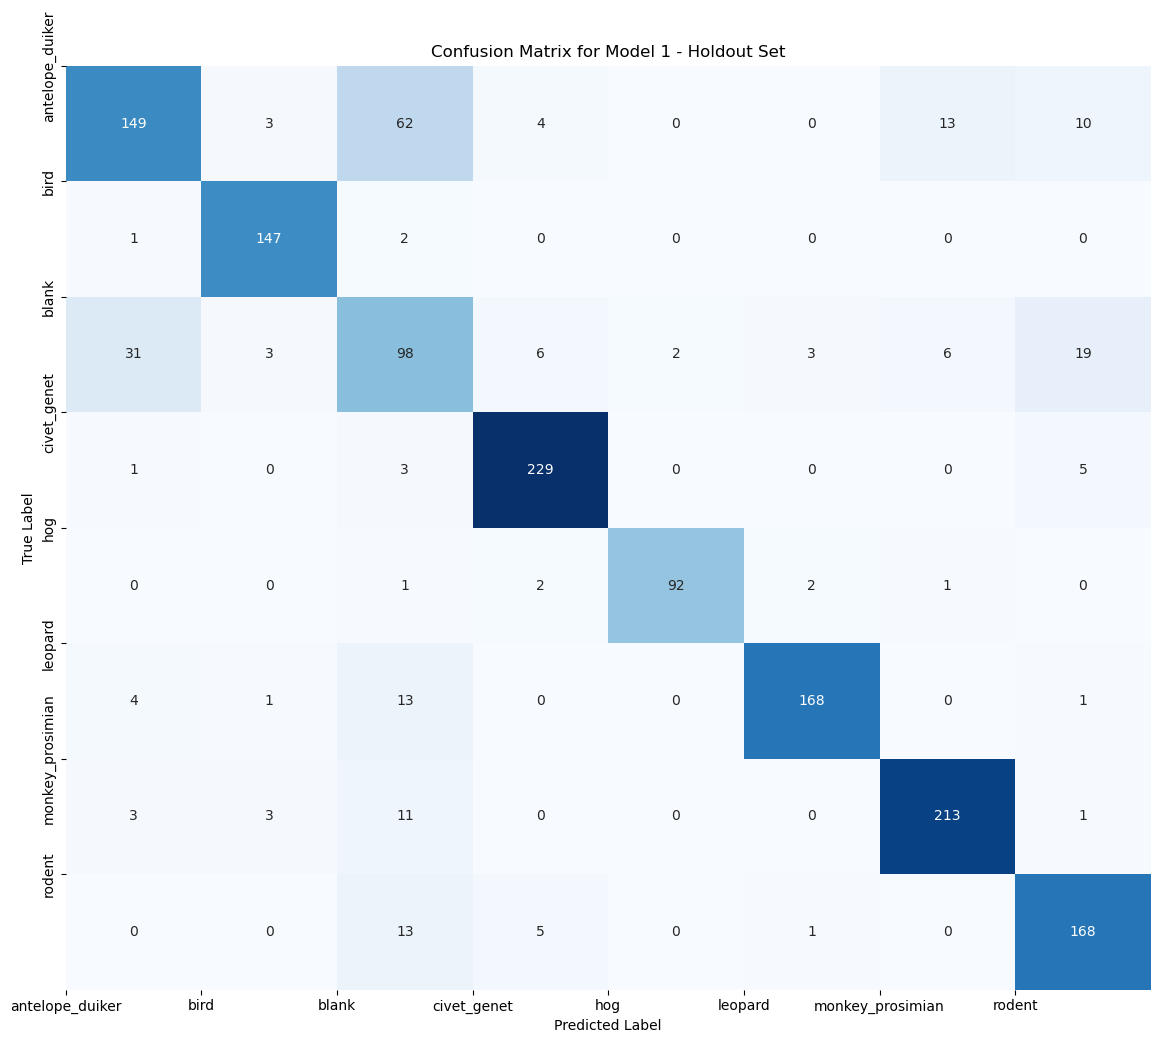

In [193]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm1holdout3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 1 - Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()

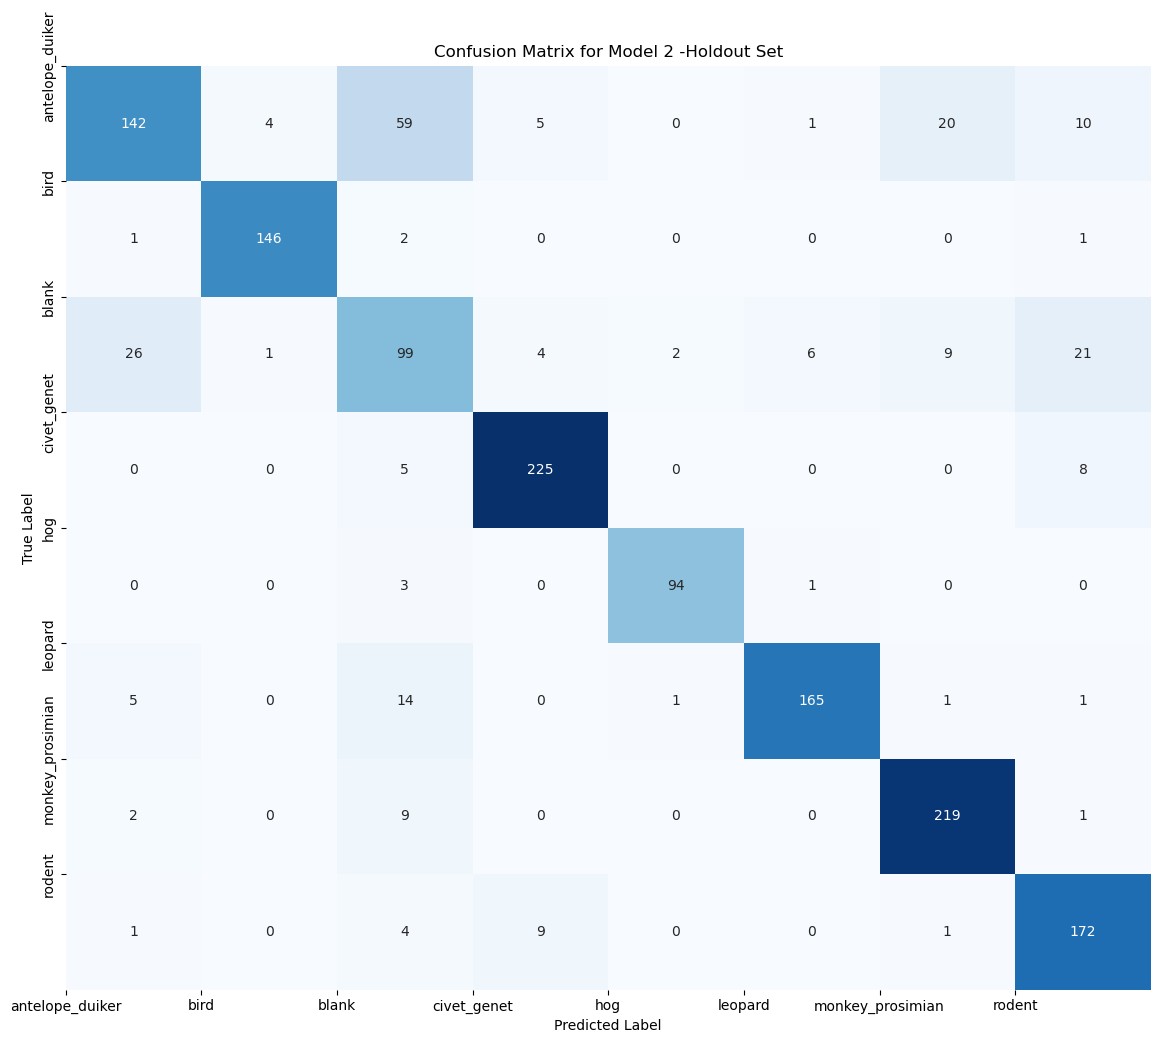

In [194]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm1holdout1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 2 -Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()

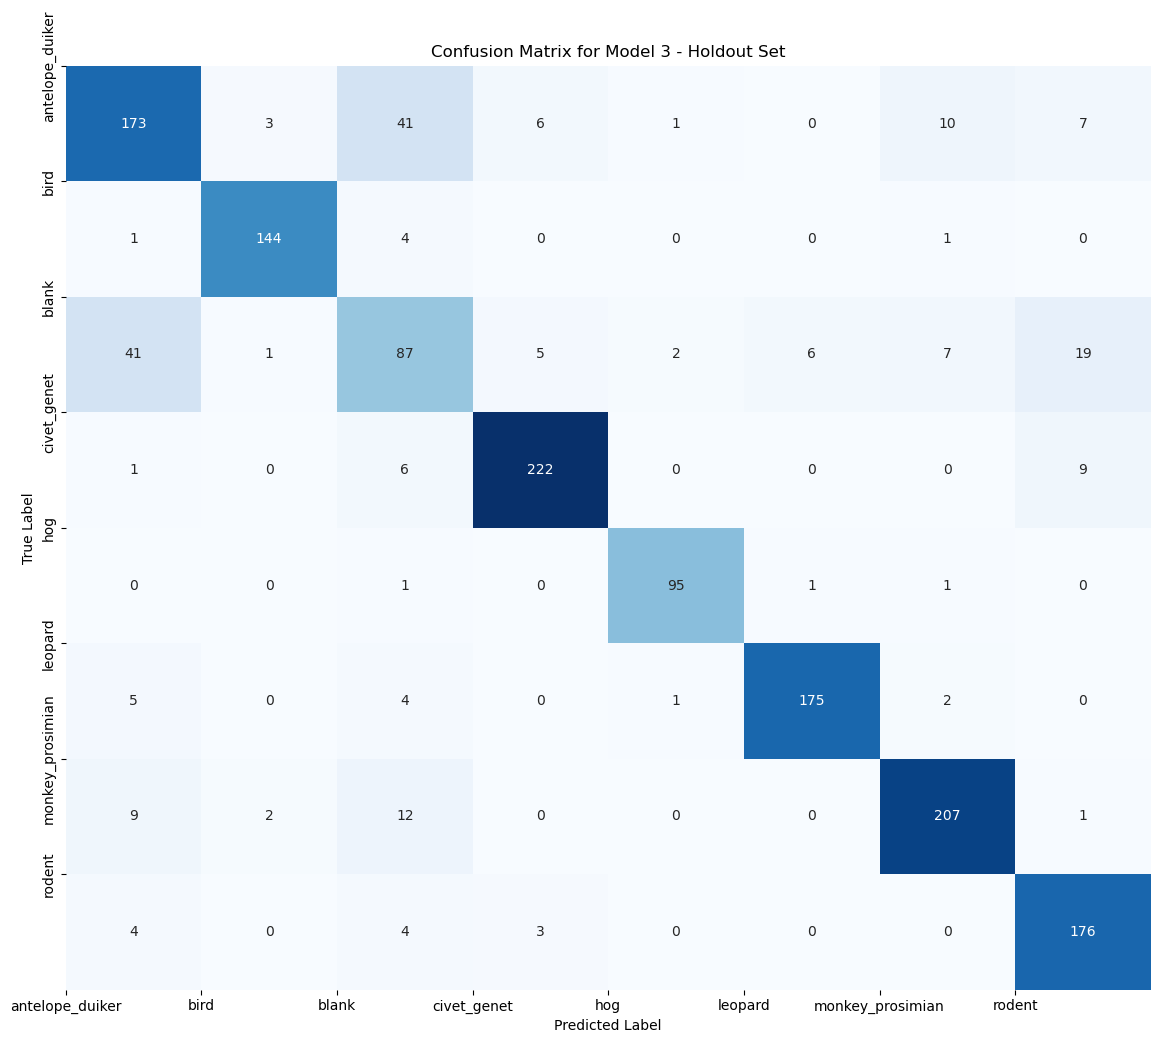

In [190]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm1holdout, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 3 - Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()


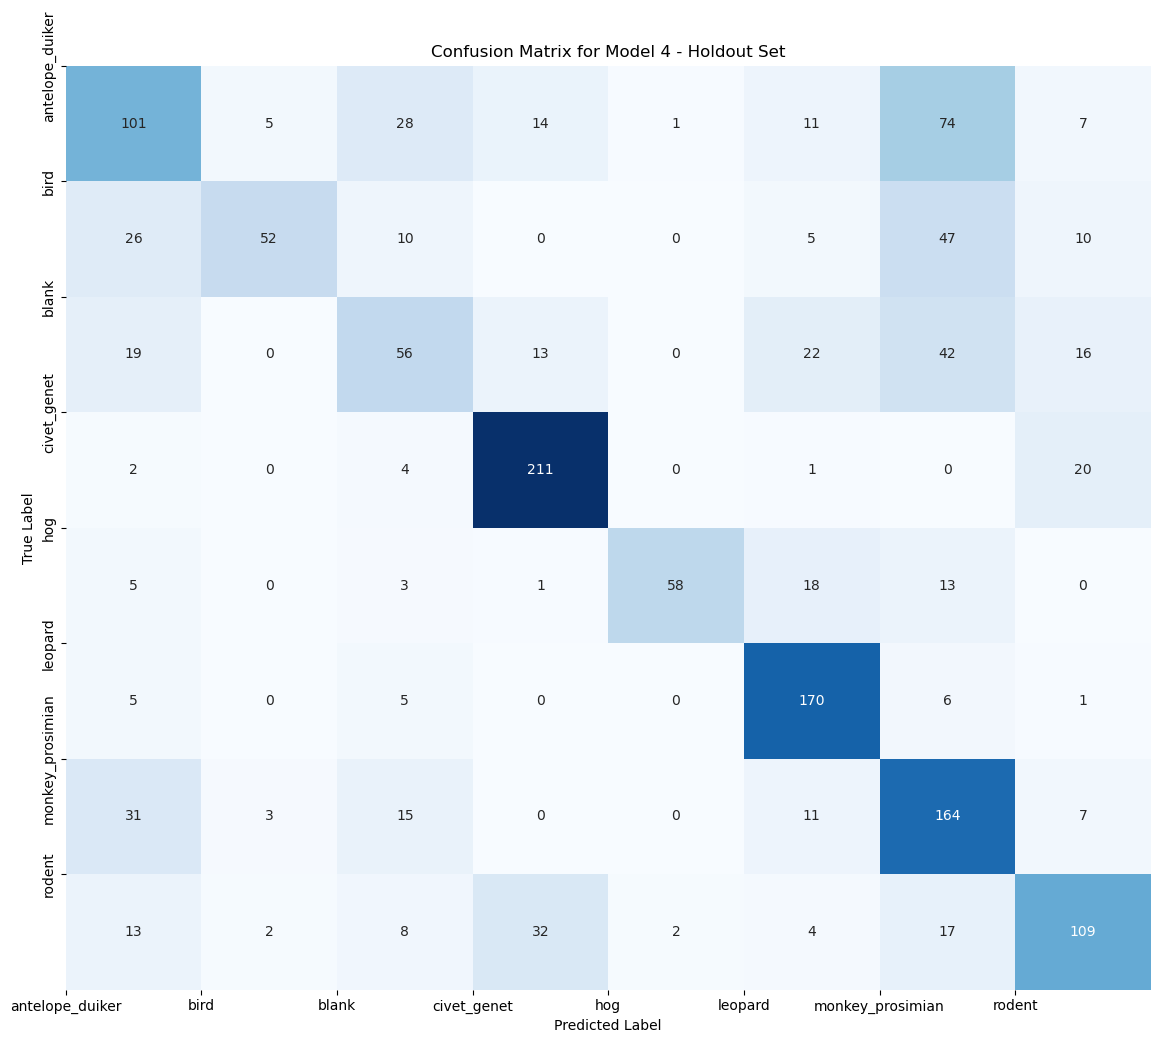

In [192]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm1holdout4, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Model 4 - Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.yticks(ticks=np.arange(len(classlabel)), labels=classlabel)
plt.show()

# Summary

### 1. Model 3 with 2 Convolutional layers of 3x3 matrix and 1 Dense layer Provides highest accuracy among all models

### 2. All Models perfomed well on classification of all classes except for blank class. This can be due to noise or blur in images resulting in improper training.

### 3. Adding more layers or more units to the model doesnt garuntee higher accuracy.

### 4. Adding more data while being computationally heavy, Significantly improves the abilitiy of the model to generalise on unseen data.


# Appendix:- Other Models we trained and experimented with

In [38]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable=False
x = base_model.output


x= Conv2D(32, (3, 3), activation='relu')(x)
x= MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model1 = Model(inputs=base_model.input, outputs=predictions)


In [59]:
model5 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model5.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 219s 643ms/step - loss: 1.7019 - accuracy: 0.3280 - val_loss: 1.5051 - val_accuracy: 0.4211
Epoch 2/10
338/338 [==============================] - 212s 627ms/step - loss: 1.3318 - accuracy: 0.4921 - val_loss: 1.2029 - val_accuracy: 0.5481
Epoch 3/10
338/338 [==============================] - 212s 626ms/step - loss: 1.0200 - accuracy: 0.6274 - val_loss: 0.9391 - val_accuracy: 0.6715
Epoch 4/10
338/338 [==============================] - 213s 630ms/step - loss: 0.7929 - accuracy: 0.7124 - val_loss: 0.8103 - val_accuracy: 0.7244
Epoch 5/10
338/338 [==============================] - 211s 625ms/step - loss: 0.6389 - accuracy: 0.7706 - val_loss: 0.8306 - val_accuracy: 0.7233
Epoch 6/10
338/338 [==============================] - 213s 630ms/step - loss: 0.5154 - accuracy: 0.8159 - val_loss: 0.7152 - val_accuracy: 0.7696
Epoch 7/10
338/338 [==============================] - 211s 625ms/step - loss: 0.4413 - accuracy: 0.8431 - val_loss: 0.6617 -

In [40]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
338/338 [==============================] - 1136s 3s/step - loss: 1.4992 - accuracy: 0.4106 - val_loss: 1.3586 - val_accuracy: 0.4715
Epoch 2/10
338/338 [==============================] - 1132s 3s/step - loss: 1.1943 - accuracy: 0.5517 - val_loss: 1.1609 - val_accuracy: 0.5748
Epoch 3/10
338/338 [==============================] - 1129s 3s/step - loss: 1.0243 - accuracy: 0.6217 - val_loss: 0.9769 - val_accuracy: 0.6393
Epoch 4/10
338/338 [==============================] - 1125s 3s/step - loss: 0.9209 - accuracy: 0.6571 - val_loss: 0.9128 - val_accuracy: 0.6670
Epoch 5/10
338/338 [==============================] - 1124s 3s/step - loss: 0.8203 - accuracy: 0.6952 - val_loss: 0.9319 - val_accuracy: 0.6681
Epoch 6/10
338/338 [==============================] - 1126s 3s/step - loss: 0.7649 - accuracy: 0.7211 - val_loss: 0.8256 - val_accuracy: 0.7048
Epoch 7/10
338/338 [==============================] - 1124s 3s/step - loss: 0.6810 - accuracy: 0.7522 - val_loss: 0.8484 - val_accuracy:

In [51]:
model4 = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))


test_loss, test_accuracy = model4.evaluate(X_holdout, y_holdout)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 343s 1s/step - loss: 1.5326 - accuracy: 0.4123 - val_loss: 1.1663 - val_accuracy: 0.5804
Epoch 2/10
338/338 [==============================] - 334s 988ms/step - loss: 0.9062 - accuracy: 0.6809 - val_loss: 0.7619 - val_accuracy: 0.7274
Epoch 3/10
338/338 [==============================] - 334s 989ms/step - loss: 0.5902 - accuracy: 0.7894 - val_loss: 0.6757 - val_accuracy: 0.7870
Epoch 4/10
338/338 [==============================] - 331s 980ms/step - loss: 0.4166 - accuracy: 0.8532 - val_loss: 0.6675 - val_accuracy: 0.8022
Epoch 5/10
338/338 [==============================] - 372s 1s/step - loss: 0.3118 - accuracy: 0.8920 - val_loss: 0.6697 - val_accuracy: 0.8126
Epoch 6/10
338/338 [==============================] - 352s 1s/step - loss: 0.2461 - accuracy: 0.9119 - val_loss: 0.6206 - val_accuracy: 0.8281
Epoch 7/10
338/338 [==============================] - 372s 1s/step - loss: 0.2015 - accuracy: 0.9305 - val_loss: 0.6708 - val_accurac

In [63]:
model8 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model8.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model8.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 165s 473ms/step - loss: 1.4896 - accuracy: 0.4627 - val_loss: 1.0919 - val_accuracy: 0.6178
Epoch 2/10
338/338 [==============================] - 153s 452ms/step - loss: 0.9162 - accuracy: 0.6821 - val_loss: 0.8178 - val_accuracy: 0.7307
Epoch 3/10
338/338 [==============================] - 149s 441ms/step - loss: 0.6966 - accuracy: 0.7616 - val_loss: 0.8836 - val_accuracy: 0.7074
Epoch 4/10
338/338 [==============================] - 122s 361ms/step - loss: 0.5528 - accuracy: 0.8094 - val_loss: 0.7219 - val_accuracy: 0.7726
Epoch 5/10
338/338 [==============================] - 114s 338ms/step - loss: 0.4561 - accuracy: 0.8432 - val_loss: 0.6787 - val_accuracy: 0.7959
Epoch 6/10
338/338 [==============================] - 113s 336ms/step - loss: 0.3899 - accuracy: 0.8677 - val_loss: 0.6605 - val_accuracy: 0.8093
Epoch 7/10
338/338 [==============================] - 113s 335ms/step - loss: 0.3393 - accuracy: 0.8854 - val_loss: 0.6785 -

In [56]:
model4.save("3conv2Dense")

INFO:tensorflow:Assets written to: 3conv2Dense\assets


INFO:tensorflow:Assets written to: 3conv2Dense\assets


In [64]:
model9 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model9.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model9.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 101s 296ms/step - loss: 1.5168 - accuracy: 0.4384 - val_loss: 1.1992 - val_accuracy: 0.5730
Epoch 2/10
338/338 [==============================] - 100s 296ms/step - loss: 1.0020 - accuracy: 0.6481 - val_loss: 0.9213 - val_accuracy: 0.7019
Epoch 3/10
338/338 [==============================] - 102s 302ms/step - loss: 0.7507 - accuracy: 0.7382 - val_loss: 0.7668 - val_accuracy: 0.7419
Epoch 4/10
338/338 [==============================] - 101s 300ms/step - loss: 0.5927 - accuracy: 0.7976 - val_loss: 0.7467 - val_accuracy: 0.7604
Epoch 5/10
338/338 [==============================] - 100s 296ms/step - loss: 0.4862 - accuracy: 0.8343 - val_loss: 0.7360 - val_accuracy: 0.7637
Epoch 6/10
338/338 [==============================] - 101s 300ms/step - loss: 0.4127 - accuracy: 0.8622 - val_loss: 0.6587 - val_accuracy: 0.7981
Epoch 7/10
338/338 [==============================] - 100s 297ms/step - loss: 0.3489 - accuracy: 0.8811 - val_loss: 0.6434 -

In [65]:
model10 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model10.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model10.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
338/338 [==============================] - 97s 285ms/step - loss: 1.5072 - accuracy: 0.4304 - val_loss: 1.2434 - val_accuracy: 0.5681
Epoch 2/10
338/338 [==============================] - 98s 289ms/step - loss: 0.9916 - accuracy: 0.6448 - val_loss: 0.8743 - val_accuracy: 0.6830
Epoch 3/10
338/338 [==============================] - 96s 285ms/step - loss: 0.7141 - accuracy: 0.7437 - val_loss: 0.7571 - val_accuracy: 0.7356
Epoch 4/10
338/338 [==============================] - 96s 283ms/step - loss: 0.5457 - accuracy: 0.8044 - val_loss: 0.6874 - val_accuracy: 0.7656
Epoch 5/10
338/338 [==============================] - 96s 283ms/step - loss: 0.4490 - accuracy: 0.8381 - val_loss: 0.6396 - val_accuracy: 0.7885
Epoch 6/10
338/338 [==============================] - 97s 287ms/step - loss: 0.3646 - accuracy: 0.8728 - val_loss: 0.6789 - val_accuracy: 0.8015
Epoch 7/10
338/338 [==============================] - 96s 283ms/step - loss: 0.3008 - accuracy: 0.8929 - val_loss: 0.6735 - val_ac

In [60]:
model5.save("4conv4Dense")

INFO:tensorflow:Assets written to: 4conv4Dense\assets


INFO:tensorflow:Assets written to: 4conv4Dense\assets
